# Tweeter Sentiment Analysis

In [39]:
import tweepy
import mysql.connector
import re
from datetime import datetime, timedelta
from mysql.connector import errorcode
import re
import tweepy
import mysql.connector
!pip install textblob
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Authenticate with the Twitter API

consumer_key = 'pp8B88kuE14qlItdZiChhQrYs'
consumer_secret = 'yXU83R9xNn6AXeD5GvHkT0sMJulUDoVvlZkJHfQOi4d0DAN0Rj'
access_token = '1284918780494262272-4nOtTNvPsO5JtU2fFpxxoyeYEUPKYl'
access_token_secret = '5hmLMqsKTMOUBqwrpTxTaehboEvS8aJZDX7BtZcjcUZCa'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#Create API object
api = tweepy.API(auth)

#### We extract tweets regarding Max Verstappen 

In [3]:
# Define the query to search for tweets
today = datetime.now()
one_week_ago = today - timedelta(days=7)

keyword = 'Max Verstappen'

# Search for tweets
searched_tweets_max = [status for status in tweepy.Cursor(api.search_tweets, q=keyword, tweet_mode = 'extended', lang = 'en', since_id=one_week_ago.strftime('%Y-%m-%d'),
                       until=today.strftime('%Y-%m-%d')).items(500)]

# Print the number of tweets found
print(f"Number of tweets found: {len(searched_tweets_max)}")

Number of tweets found: 500


In [4]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)

try:
    if cnx.is_connected():
        print("CONNECTED TO MYSQL DATABASE!")
        
        # Create table
        cursor = cnx.cursor()
        cursor.execute("CREATE TABLE tweets_max (id INT AUTO_INCREMENT PRIMARY KEY, username VARCHAR(50), followers INT, tweets_plus_retweets INT, text VARCHAR(2000), date DATETIME, location VARCHAR(100), hashtags VARCHAR(2000))")


        # Insert tweets into MySQL table
        for tweet in searched_tweets_max:
            username = tweet.user.screen_name
            followers = tweet.user.followers_count
            tweets_plus_retweets = tweet.user.statuses_count
            text = re.sub(r'http\S+', '', tweet.full_text) # remove URLs
            text = re.sub(r'@\S+', '', text) # remove mentions
            date = tweet.created_at
            location = tweet.user.location
            hashtags = [hashtag['text'] for hashtag in tweet.entities['hashtags']]
            hashtags = ','.join(hashtags)
            
            cursor.execute("INSERT INTO tweets_max (username, followers, tweets_plus_retweets, text, date, location, hashtags) VALUES (%s, %s, %s, %s, %s, %s, %s)", (username, followers, tweets_plus_retweets, text, date, location, hashtags))
    
    print('end of try statement')
            
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
else:
    
    # Commit changes
    cnx.commit()

    # Close MySQL connection
    cursor.close()
    cnx.close()

CONNECTED TO MYSQL DATABASE!
end of try statement


In [6]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)


# Create a cursor object to execute SQL queries
cursor = cnx.cursor()

# Select all rows from the tweets table
cursor.execute("SELECT text FROM tweets_max")

# Loop through the rows each tweet and select the text only if it is empty meaning it contains only links and mentions
for text in cursor.fetchall():
    if text == '':
        print(text)

print('end for loop')

# Close the cursor and database connections
cursor.close()
cnx.close()

end for loop


#### Next, we extract tweets regarding Lewis Hamilton

In [7]:
# Define the query to search for tweets
today = datetime.now()
one_week_ago = today - timedelta(days=7)

keyword = 'Lewis Hamilton'

# Search for tweets
searched_tweets_lewis = [status for status in tweepy.Cursor(api.search_tweets, q=keyword, tweet_mode = 'extended', lang = 'en', since_id=one_week_ago.strftime('%Y-%m-%d'),
                       until=today.strftime('%Y-%m-%d')).items(500)]

# Print the number of tweets found
print(f"Number of tweets found: {len(searched_tweets_lewis)}")

Number of tweets found: 500


In [8]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)

try:
    if cnx.is_connected():
        print("CONNECTED TO MYSQL DATABASE!")
        
        # Create table
        cursor = cnx.cursor()
        cursor.execute("CREATE TABLE tweets_lewis (id INT AUTO_INCREMENT PRIMARY KEY, username VARCHAR(50), followers INT, tweets_plus_retweets INT, text VARCHAR(2000), date DATETIME, location VARCHAR(200), hashtags VARCHAR(2000))")


        # Insert tweets into MySQL table
        for tweet in searched_tweets_lewis:
            username = tweet.user.screen_name
            followers = tweet.user.followers_count
            tweets_plus_retweets = tweet.user.statuses_count
            text = re.sub(r'http\S+', '', tweet.full_text) # remove URLs
            text = re.sub(r'@\S+', '', text) # remove mentions
            date = tweet.created_at
            location = tweet.user.location
            hashtags = [hashtag['text'] for hashtag in tweet.entities['hashtags']]
            hashtags = ','.join(hashtags)
            cursor.execute("INSERT INTO tweets_lewis (username, followers, tweets_plus_retweets, text, date, location, hashtags) VALUES (%s, %s, %s, %s, %s, %s, %s)", (username, followers, tweets_plus_retweets, text, date, location, hashtags))
    
    print('end of try statement')
            
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
else:
    
    # Commit changes
    cnx.commit()

    # Close MySQL connection
    cursor.close()
    cnx.close()


CONNECTED TO MYSQL DATABASE!
end of try statement


In [10]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)


# Create a cursor object to execute SQL queries
cursor = cnx.cursor()

# Select all rows from the tweets table
cursor.execute("SELECT text FROM tweets_lewis")

# Loop through the rows each tweet and select the text only if it is empty meaning it contains only links and mentions
for text in cursor.fetchall():
    if text == '':
        print(text)

print('end of for loop')

# Close the cursor and database connections
cursor.close()
cnx.close()

end of for loop


#### Next, we extract tweets regarding Charles Leclerc

In [11]:
# Define the query to search for tweets
today = datetime.now()
one_week_ago = today - timedelta(days=7)

keyword = 'Charles Leclerc'

# Search for tweets
searched_tweets_lec = [status for status in tweepy.Cursor(api.search_tweets, q=keyword, tweet_mode = 'extended', lang = 'en', since_id=one_week_ago.strftime('%Y-%m-%d'),
                       until=today.strftime('%Y-%m-%d')).items(500)]

# Print the number of tweets found
print(f"Number of tweets found: {len(searched_tweets_lec)}")

Number of tweets found: 500


In [12]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)

try:
    if cnx.is_connected():
        print("CONNECTED TO MYSQL DATABASE!")
        
        # Create table
        cursor = cnx.cursor()
        cursor.execute("CREATE TABLE tweets_lec (id INT AUTO_INCREMENT PRIMARY KEY, username VARCHAR(50), followers INT, tweets_plus_retweets INT, text VARCHAR(2000), date DATETIME, location VARCHAR(200), hashtags VARCHAR(2000))")


        # Insert tweets into MySQL table
        for tweet in searched_tweets_lec:
            username = tweet.user.screen_name
            followers = tweet.user.followers_count
            tweets_plus_retweets = tweet.user.statuses_count
            text = re.sub(r'http\S+', '', tweet.full_text) # remove URLs
            text = re.sub(r'@\S+', '', text) # remove mentions
            date = tweet.created_at
            location = tweet.user.location
            hashtags = [hashtag['text'] for hashtag in tweet.entities['hashtags']]
            hashtags = ','.join(hashtags)
            cursor.execute("INSERT INTO tweets_lec (username, followers, tweets_plus_retweets, text, date, location, hashtags) VALUES (%s, %s, %s, %s, %s, %s, %s)", (username, followers, tweets_plus_retweets, text, date, location, hashtags))
    
    print('end of try statement')
            
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
else:
    
    # Commit changes
    cnx.commit()

    # Close MySQL connection
    cursor.close()
    cnx.close()


CONNECTED TO MYSQL DATABASE!
end of try statement


In [13]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)


# Create a cursor object to execute SQL queries
cursor = cnx.cursor()

# Select all rows from the tweets table
cursor.execute("SELECT text FROM tweets_lec")

# Loop through the rows each tweet and select the text only if it is empty meaning it contains only links and mentions
for text in cursor.fetchall():
    if text == '':
        print(text)

print('end of for loop')

# Close the cursor and database connections
cursor.close()
cnx.close()

end of for loop


### In the following rows, we create a new attribute called sentiment and now we classify the sentiment of each tweet

#### We start by examining the sentiment of max verstappen's tweets

In [14]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)


# Create a cursor object to execute SQL queries
cursor = cnx.cursor()

# Select all rows from the tweets table
cursor.execute("SELECT id, text FROM tweets_max")

# Loop through the rows and classify the sentiment of each tweet
for id, text in cursor.fetchall():
    # Create a TextBlob object from the tweet text
    blob = TextBlob(text)
    
    # Classify the sentiment as negative, neutral, or positive
    if blob.sentiment.polarity < 0:
        sentiment = "negative"
    elif blob.sentiment.polarity == 0:
        sentiment = "neutral"
    else:
        sentiment = "positive"
    
    # Update the corresponding row in the table with the sentiment value
    cursor.execute("UPDATE tweets_max SET sentiment=%s WHERE id=%s", (sentiment, id))

#make a print statement to check if the loop is completed
print('end of for loop so it is ok')

# Commit the changes to the database
cnx.commit()

# Close the cursor and database connections
cursor.close()
cnx.close()

end of for loop so it is ok


#### Now, we examine the sentiment of Lewis Hamilton's tweets

In [15]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)


# Create a cursor object to execute SQL queries
cursor = cnx.cursor()

# Select all rows from the tweets table
cursor.execute("SELECT id, text FROM tweets_lewis")

# Loop through the rows and classify the sentiment of each tweet
for id, text in cursor.fetchall():
    # Create a TextBlob object from the tweet text
    blob = TextBlob(text)
    
    # Classify the sentiment as negative, neutral, or positive
    if blob.sentiment.polarity < 0:
        sentiment = "negative"
    elif blob.sentiment.polarity == 0:
        sentiment = "neutral"
    else:
        sentiment = "positive"
    
    # Update the corresponding row in the table with the sentiment value
    cursor.execute("UPDATE tweets_lewis SET sentiment=%s WHERE id=%s", (sentiment, id))

#make a print statement to check if the loop is completed
print('end of for loop so it is ok')

# Commit the changes to the database
cnx.commit()

# Close the cursor and database connections
cursor.close()
cnx.close()

end of for loop so it is ok


#### Bellow, we examine the sentiment of Charles Leclerc's tweets

In [16]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)


# Create a cursor object to execute SQL queries
cursor = cnx.cursor()

# Select all rows from the tweets table
cursor.execute("SELECT id, text FROM tweets_lec")

# Loop through the rows and classify the sentiment of each tweet
for id, text in cursor.fetchall():
    # Create a TextBlob object from the tweet text
    blob = TextBlob(text)
    
    # Classify the sentiment as negative, neutral, or positive
    if blob.sentiment.polarity < 0:
        sentiment = "negative"
    elif blob.sentiment.polarity == 0:
        sentiment = "neutral"
    else:
        sentiment = "positive"
    
    # Update the corresponding row in the table with the sentiment value
    cursor.execute("UPDATE tweets_lec SET sentiment=%s WHERE id=%s", (sentiment, id))

#make a print statement to check if the loop is completed
print('end of for loop so it is ok')

# Commit the changes to the database
cnx.commit()

# Close the cursor and database connections
cursor.close()
cnx.close()

end of for loop so it is ok


### Now, we proceed with the extraction of meaningful insights through vizualizations

#### Firstly, we plot the distribution of positive, negative and neutral tweets

#### Bellow, we begin by Max Verstappen's sentiment distribution

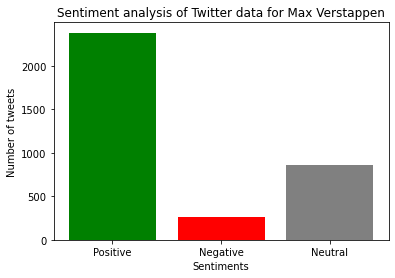

In [17]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)

# Create a cursor object to execute SQL queries
cursor = cnx.cursor()

# Select all rows from the tweets table
cursor.execute("SELECT sentiment, COUNT(*) FROM tweets_max GROUP BY sentiment")

# Initialize variables to store the number of positive, negative, and neutral tweets
pos_count = 0
neg_count = 0
neut_count = 0

# Loop through the rows and count the number of positive, negative, and neutral tweets
for sentiment, count in cursor.fetchall():
    if sentiment == 'positive':
        pos_count = count
    elif sentiment == 'negative':
        neg_count = count
    elif sentiment == 'neutral':
        neut_count = count

# Close the cursor and database connections
cursor.close()
cnx.close()

# Plot the data
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [pos_count, neg_count, neut_count]
colors = ['green', 'red', 'grey']
plt.bar(sentiments, counts, color=colors)
plt.xlabel('Sentiments')
plt.ylabel('Number of tweets')
plt.title('Sentiment analysis of Twitter data for Max Verstappen')
plt.show()

#### Next, you can see Lewis Hamilton's sentiment distribution

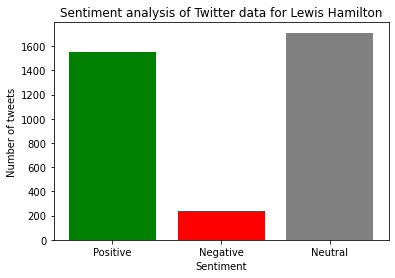

In [18]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)

# Create a cursor object to execute SQL queries
cursor = cnx.cursor()

# Select all rows from the tweets table
cursor.execute("SELECT sentiment, COUNT(*) FROM tweets_lewis GROUP BY sentiment")

# Initialize variables to store the number of positive, negative, and neutral tweets
pos_count = 0
neg_count = 0
neut_count = 0

# Loop through the rows and count the number of positive, negative, and neutral tweets
for sentiment, count in cursor.fetchall():
    if sentiment == 'positive':
        pos_count = count
    elif sentiment == 'negative':
        neg_count = count
    elif sentiment == 'neutral':
        neut_count = count

# Close the cursor and database connections
cursor.close()
cnx.close()

# Plot the data
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [pos_count, neg_count, neut_count]
colors = ['green', 'red', 'grey']
plt.bar(sentiments, counts, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.title('Sentiment analysis of Twitter data for Lewis Hamilton')
plt.show()

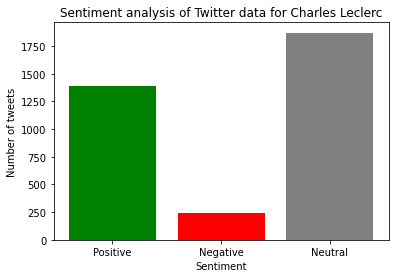

In [19]:

# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)

# Create a cursor object to execute SQL queries
cursor = cnx.cursor()

# Select all rows from the tweets table
cursor.execute("SELECT sentiment, COUNT(*) FROM tweets_lec GROUP BY sentiment")

# Initialize variables to store the number of positive, negative, and neutral tweets
pos_count = 0
neg_count = 0
neut_count = 0

# Loop through the rows and count the number of positive, negative, and neutral tweets
for sentiment, count in cursor.fetchall():
    if sentiment == 'positive':
        pos_count = count
    elif sentiment == 'negative':
        neg_count = count
    elif sentiment == 'neutral':
        neut_count = count

# Close the cursor and database connections
cursor.close()
cnx.close()

# Plot the data
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [pos_count, neg_count, neut_count]
colors = ['green', 'red', 'grey']
plt.bar(sentiments, counts, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.title('Sentiment analysis of Twitter data for Charles Leclerc')
plt.show()

### Now, we create some scatter plots for each F1 driver to get a view of the sentiment's polarity and subjectivity meaning how positive/negative and subjective/objective each tweet is

#### As always, we begin with Max Verstappen's tweets

In [20]:
#Create functions to be used later for polarity and subjectivity
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [21]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)


# Create a cursor object to execute SQL queries
cursor = cnx.cursor()


# Select all rows from the tweets table
cursor.execute("SELECT id FROM tweets_max")

#count the length of the tweets
length = 0
for i in cursor.fetchall():
    length += 1
    
#create numpy arrays filled with zeros
tweet_polarity = np.zeros(length)
tweet_subjectivity = np.zeros(length)

In [22]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)


# Create a cursor object to execute SQL queries
cursor = cnx.cursor()


# Select all rows from the tweets table
cursor.execute("SELECT text FROM tweets_max")

# Loop through the rows and classify the sentiment of each tweet
for id, row in enumerate(cursor.fetchall()):
    text = row[0]
    tweet_polarity[id] = polarity(text)
    tweet_subjectivity[id] = subjectivity(text)

C:\Users\galan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


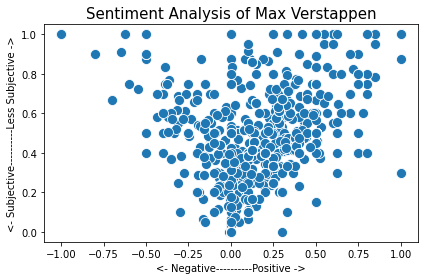

In [25]:
plt.figure(figsize=(6, 4))

sns.scatterplot(tweet_polarity,
                tweet_subjectivity,
                s = 100);


plt.title('Sentiment Analysis of Max Verstappen', fontsize = 15)
plt.xlabel('<- Negative----------Positive ->', fontsize = 10)
plt.ylabel('<- Subjective----------Less Subjective ->', fontsize = 10)
plt.tight_layout()

#### We create the sentiment analysis for Lewis Hamilton

In [26]:
#Create functions to be used later for polarity and subjectivity
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [27]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)


# Create a cursor object to execute SQL queries
cursor = cnx.cursor()


# Select all rows from the tweets table
cursor.execute("SELECT id FROM tweets_lewis")

#count the length of the tweets
length = 0
for i in cursor.fetchall():
    length += 1
    
#create numpy arrays filled with zeros
tweet_polarity = np.zeros(length)
tweet_subjectivity = np.zeros(length)

In [28]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)


# Create a cursor object to execute SQL queries
cursor = cnx.cursor()


# Select all rows from the tweets table
cursor.execute("SELECT text FROM tweets_lewis")

# Loop through the rows and classify the sentiment of each tweet
for id, row in enumerate(cursor.fetchall()):
    text = row[0]
    tweet_polarity[id] = polarity(text)
    tweet_subjectivity[id] = subjectivity(text)

C:\Users\galan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


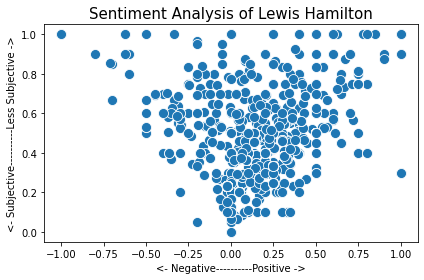

In [29]:
plt.figure(figsize=(6, 4))

sns.scatterplot(tweet_polarity,
                tweet_subjectivity,
                s = 100);


plt.title('Sentiment Analysis of Lewis Hamilton', fontsize = 15)
plt.xlabel('<- Negative----------Positive ->', fontsize = 10)
plt.ylabel('<- Subjective----------Less Subjective ->', fontsize = 10)
plt.tight_layout()

#### Now, Charles Leclerc's sentiment analysis is created bellow

In [30]:
#Create functions to be used later for polarity and subjectivity
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [31]:
import numpy as np

# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)


# Create a cursor object to execute SQL queries
cursor = cnx.cursor()


# Select all rows from the tweets table
cursor.execute("SELECT id FROM tweets_lec")

#count the length of the tweets
length = 0
for i in cursor.fetchall():
    length += 1
    
#create numpy arrays filled with zeros
tweet_polarity = np.zeros(length)
tweet_subjectivity = np.zeros(length)

In [32]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)


# Create a cursor object to execute SQL queries
cursor = cnx.cursor()


# Select all rows from the tweets table
cursor.execute("SELECT text FROM tweets_lec")

# Loop through the rows and classify the sentiment of each tweet
for id, row in enumerate(cursor.fetchall()):
    text = row[0]
    tweet_polarity[id] = polarity(text)
    tweet_subjectivity[id] = subjectivity(text)

C:\Users\galan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


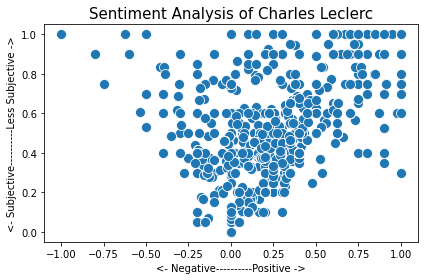

In [33]:
plt.figure(figsize=(6, 4))

sns.scatterplot(tweet_polarity,
                tweet_subjectivity,
                s = 100);


plt.title('Sentiment Analysis of Charles Leclerc', fontsize = 15)
plt.xlabel('<- Negative----------Positive ->', fontsize = 10)
plt.ylabel('<- Subjective----------Less Subjective ->', fontsize = 10)
plt.tight_layout()

### In the next step, we create some line charts in order to visualize how the sentiment changes over time.

#### Firstly, we examine Max Verstappen

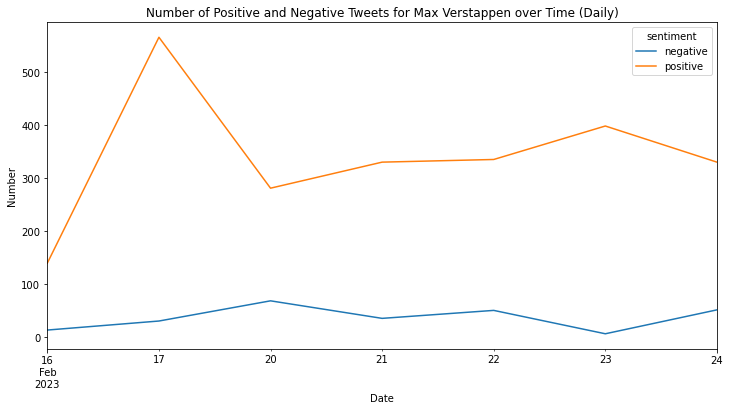

In [40]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)

# Query to get the date and sentiment and store them in a DataFrame
query = "SELECT date, sentiment FROM tweets_max"
df = pd.read_sql_query(query, cnx)

# Filter the DataFrame to include only positive and negative tweets
df = df[df['sentiment'].isin(['positive', 'negative'])]

# Aggregate the counts of positive and negative tweets by day
df.set_index('date', inplace=True)
counts = df.groupby([pd.Grouper(freq='D'), 'sentiment']).size().unstack(fill_value=0)

# Plot the counts of positive and negative tweets over time
counts.plot(kind='line', figsize=(12,6))
plt.title('Number of Positive and Negative Tweets for Max Verstappen over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Number')
plt.show()

# Close the database connection
cnx.close()

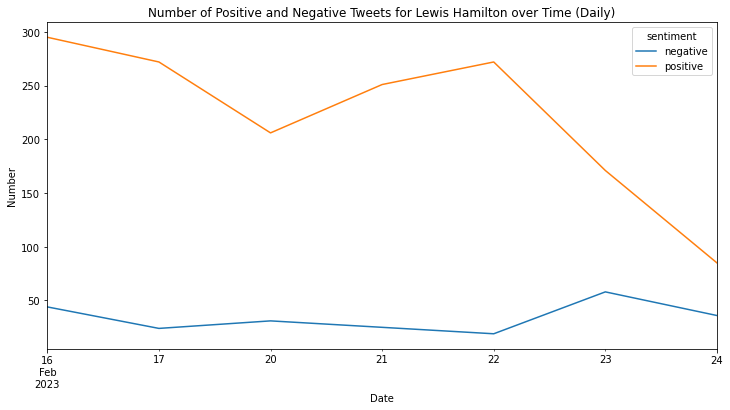

In [41]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)

# Query to get the date and sentiment and store them in a DataFrame
query = "SELECT date, sentiment FROM tweets_lewis"
df = pd.read_sql_query(query, cnx)

# Filter the DataFrame to include only positive and negative tweets
df = df[df['sentiment'].isin(['positive', 'negative'])]

# Aggregate the counts of positive and negative tweets by day
df.set_index('date', inplace=True)
counts = df.groupby([pd.Grouper(freq='D'), 'sentiment']).size().unstack(fill_value=0)

# Plot the counts of positive and negative tweets over time
counts.plot(kind='line', figsize=(12,6))
plt.title('Number of Positive and Negative Tweets for Lewis Hamilton over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Number')
plt.show()

# Close the database connection
cnx.close()

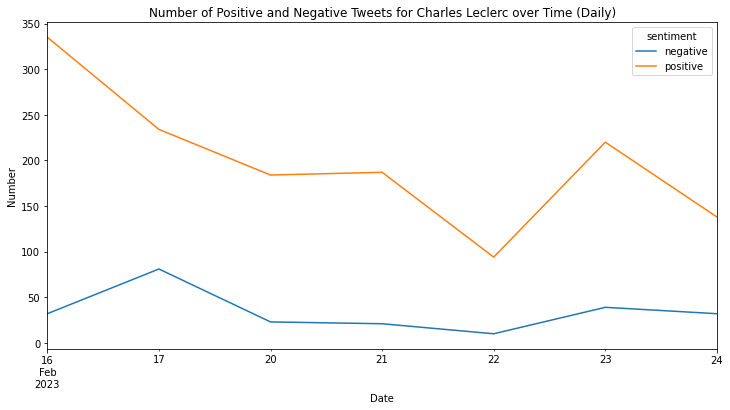

In [42]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)

# Query to get the date and sentiment and store them in a DataFrame
query = "SELECT date, sentiment FROM tweets_lec"
df = pd.read_sql_query(query, cnx)

# Filter the DataFrame to include only positive and negative tweets
df = df[df['sentiment'].isin(['positive', 'negative'])]

# Aggregate the counts of positive and negative tweets by day
df.set_index('date', inplace=True)
counts = df.groupby([pd.Grouper(freq='D'), 'sentiment']).size().unstack(fill_value=0)

# Plot the counts of positive and negative tweets over time
counts.plot(kind='line', figsize=(12,6))
plt.title('Number of Positive and Negative Tweets for Charles Leclerc over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Number')
plt.show()

# Close the database connection
cnx.close()

### In the next step, we create plots regarding how the weighted now tweets change over time. We take as a weighted factors the number of followers and tweets plus retweets each account has

#### We begin by max verstappen

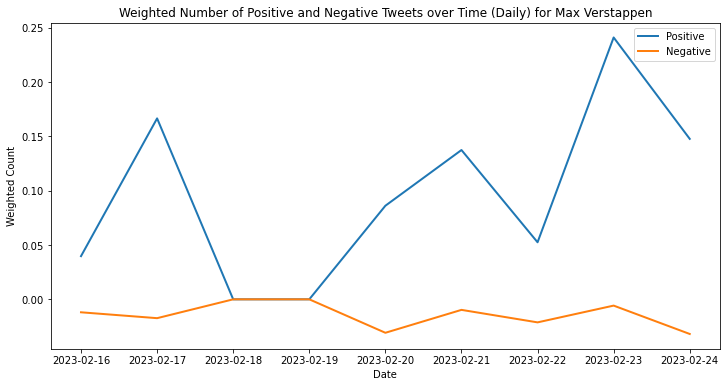

In [43]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)

# Query the database to get the tweets and their corresponding dates
query = "SELECT date, sentiment, followers, tweets_plus_retweets FROM tweets_max"
df = pd.read_sql_query(query, cnx)

# Filter the DataFrame to include only positive and negative tweets
df = df[df['sentiment'].isin(['positive', 'negative'])]

# Calculate the weights based on followers count and tweets plus retweets count
weights = df[['followers', 'tweets_plus_retweets']].sum(axis=1)
weights /= weights.sum()

# Calculate the weighted counts of positive and negative tweets
df['weighted_counts'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else -1) * weights

# Split the DataFrame into positive and negative DataFrames
df_pos = df[df['sentiment'] == 'positive']
df_neg = df[df['sentiment'] == 'negative']

# Aggregate the weighted counts of positive and negative tweets by day
df_pos.set_index('date', inplace=True)
df_neg.set_index('date', inplace=True)

weighted_counts_pos = df_pos['weighted_counts'].resample('D').sum().fillna(0)
weighted_counts_neg = df_neg['weighted_counts'].resample('D').sum().fillna(0)

# Plot the weighted counts of positive and negative tweets over time
plt.figure(figsize=(12, 6))

plt.plot(weighted_counts_pos, label='Positive', linewidth=2)
plt.plot(weighted_counts_neg, label='Negative', linewidth=2)

plt.title('Weighted Number of Positive and Negative Tweets over Time (Daily) for Max Verstappen')
plt.xlabel('Date')
plt.ylabel('Weighted Count')
plt.legend()

plt.show()

# Close the database connection
cnx.close()

#### Then, we can see the same procedure applied for Lewis Hamilton

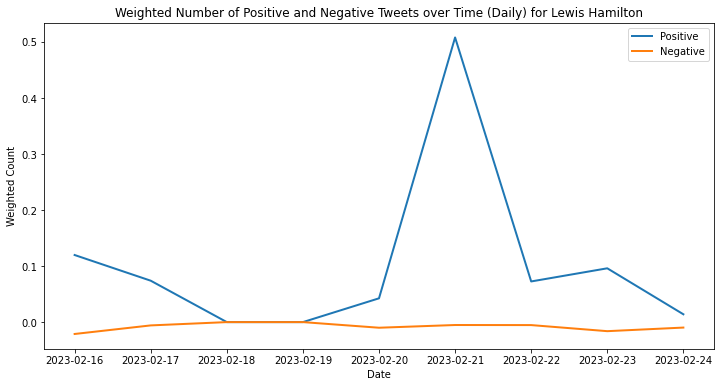

In [44]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)

# Query the database to get the tweets and their corresponding dates
query = "SELECT date, sentiment, followers, tweets_plus_retweets FROM tweets_lewis"
df = pd.read_sql_query(query, cnx)

# Filter the DataFrame to include only positive and negative tweets
df = df[df['sentiment'].isin(['positive', 'negative'])]

# Calculate the weights based on followers count and tweets plus retweets count
weights = df[['followers', 'tweets_plus_retweets']].sum(axis=1)
weights /= weights.sum()

# Calculate the weighted counts of positive and negative tweets
df['weighted_counts'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else -1) * weights

# Split the DataFrame into positive and negative DataFrames
df_pos = df[df['sentiment'] == 'positive']
df_neg = df[df['sentiment'] == 'negative']

# Aggregate the weighted counts of positive and negative tweets by day
df_pos.set_index('date', inplace=True)
df_neg.set_index('date', inplace=True)

weighted_counts_pos = df_pos['weighted_counts'].resample('D').sum().fillna(0)
weighted_counts_neg = df_neg['weighted_counts'].resample('D').sum().fillna(0)

# Plot the weighted counts of positive and negative tweets over time
plt.figure(figsize=(12, 6))

plt.plot(weighted_counts_pos, label='Positive', linewidth=2)
plt.plot(weighted_counts_neg, label='Negative', linewidth=2)

plt.title('Weighted Number of Positive and Negative Tweets over Time (Daily) for Lewis Hamilton')
plt.xlabel('Date')
plt.ylabel('Weighted Count')
plt.legend()

plt.show()

# Close the database connection
cnx.close()

#### In the end, this analysis is applied for Charles Leclerc's tweets

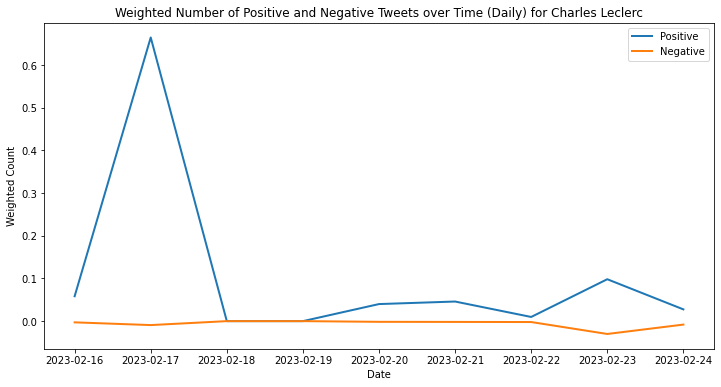

In [45]:
# MySQL connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="twitter_sentiment_analysis"
)

# Query the database to get the tweets and their corresponding dates
query = "SELECT date, sentiment, followers, tweets_plus_retweets FROM tweets_lec"
df = pd.read_sql_query(query, cnx)

# Filter the DataFrame to include only positive and negative tweets
df = df[df['sentiment'].isin(['positive', 'negative'])]

# Calculate the weights based on followers count and tweets plus retweets count
weights = df[['followers', 'tweets_plus_retweets']].sum(axis=1)
weights /= weights.sum()

# Calculate the weighted counts of positive and negative tweets
df['weighted_counts'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else -1) * weights

# Split the DataFrame into positive and negative DataFrames
df_pos = df[df['sentiment'] == 'positive']
df_neg = df[df['sentiment'] == 'negative']

# Aggregate the weighted counts of positive and negative tweets by day
df_pos.set_index('date', inplace=True)
df_neg.set_index('date', inplace=True)

weighted_counts_pos = df_pos['weighted_counts'].resample('D').sum().fillna(0)
weighted_counts_neg = df_neg['weighted_counts'].resample('D').sum().fillna(0)

# Plot the weighted counts of positive and negative tweets over time
plt.figure(figsize=(12, 6))

plt.plot(weighted_counts_pos, label='Positive', linewidth=2)
plt.plot(weighted_counts_neg, label='Negative', linewidth=2)

plt.title('Weighted Number of Positive and Negative Tweets over Time (Daily) for Charles Leclerc')
plt.xlabel('Date')
plt.ylabel('Weighted Count')
plt.legend()

plt.show()

# Close the database connection
cnx.close()